In [1]:
import os
import tarfile
import urllib

%matplotlib inline
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [2]:
def download_data(url=HOUSING_URL, path=HOUSING_PATH, force=False):
    if not os.path.isdir(path):
        os.makedirs(path)

    if force or not os.listdir(path):
        tgz_path = os.path.join(path, "housing.tgz")
        urllib.request.urlretrieve(url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=path)
        housing_tgz.close()
    else:
        print("Folder is already non-empty!")
import pandas as pd

def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
download_data(force=True)

housing = load_housing_data()

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


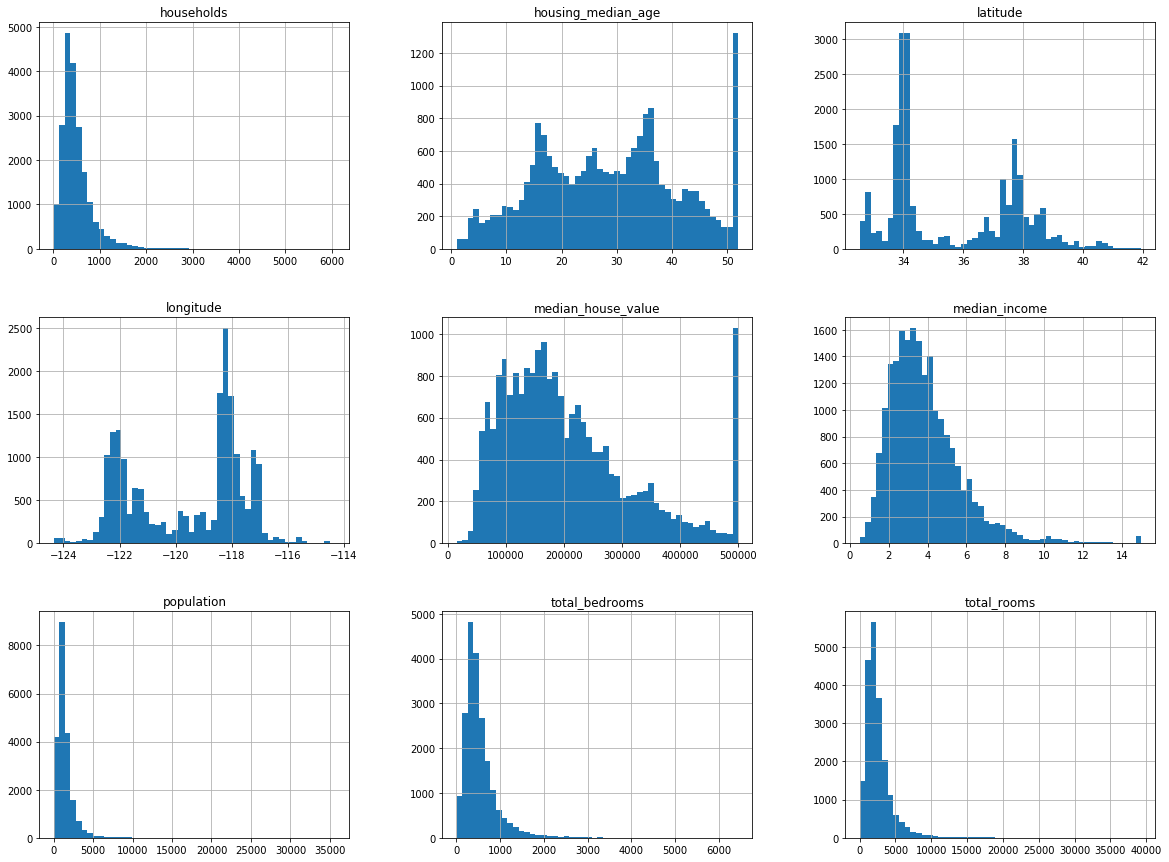

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np
def create_test_set(data, ratio=0.2):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set=create_test_set(housing)
print(len(train_set))
print(len(test_set))

16512
4128


In [10]:
import hashlib

def test_set_check(ident, test_ratio, hash):
    return hash(np.int64(ident)).digest()[-1]<256*test_ratio
def create_test_set_by_id(data, id_column, test_ratio=0.2,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id=housing.reset_index()
train_set, test_set=create_test_set_by_id(housing_with_id,"index")
print(len(train_set))
print(len(test_set))

16362
4278


In [11]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set, test_set=create_test_set_by_id(housing_with_id,"id")
print(len(train_set))
print(len(test_set))

16267
4373


In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


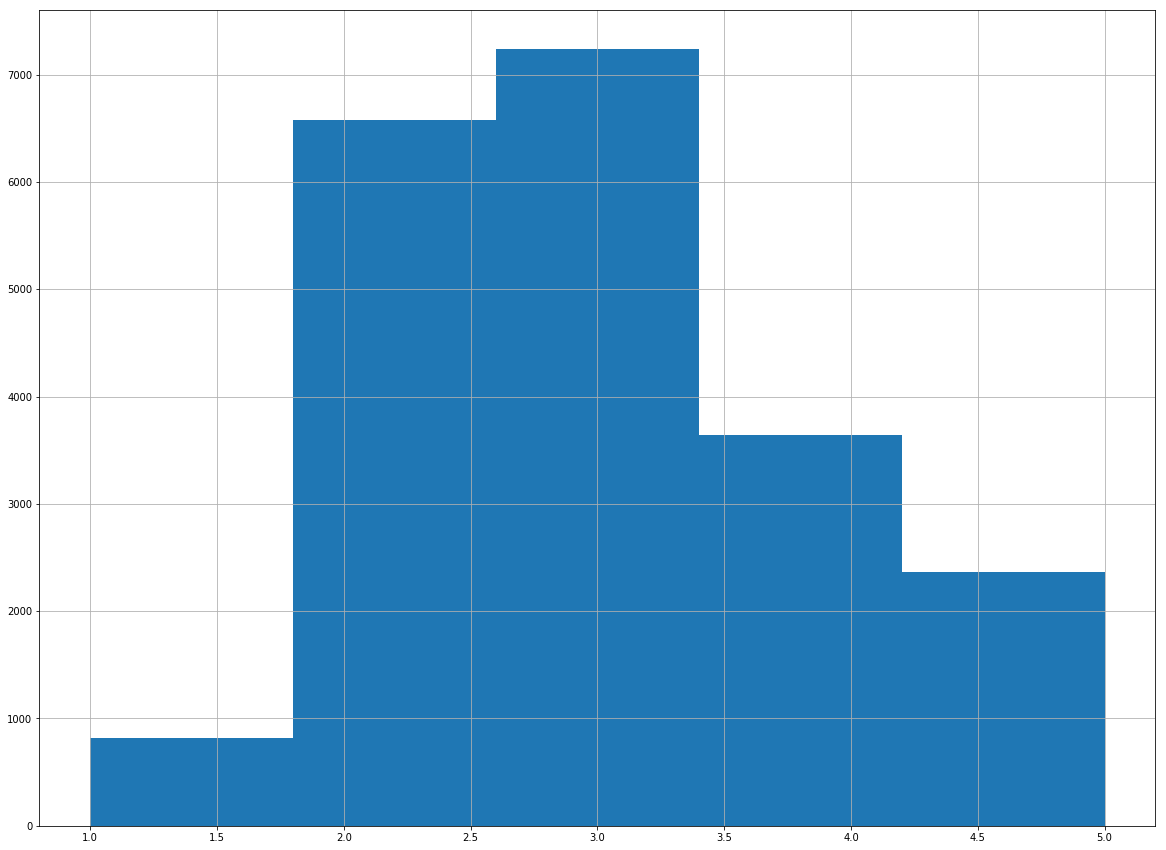

In [14]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)
housing["income_cat"].hist(bins=5, figsize=(20,15))
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [16]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [18]:
for sett in (strat_test_set, strat_train_set):
    sett.drop(["income_cat"], axis=1, inplace=True)

In [19]:
print(type(strat_test_set))

<class 'pandas.core.frame.DataFrame'>


In [20]:
housing=strat_train_set.copy()

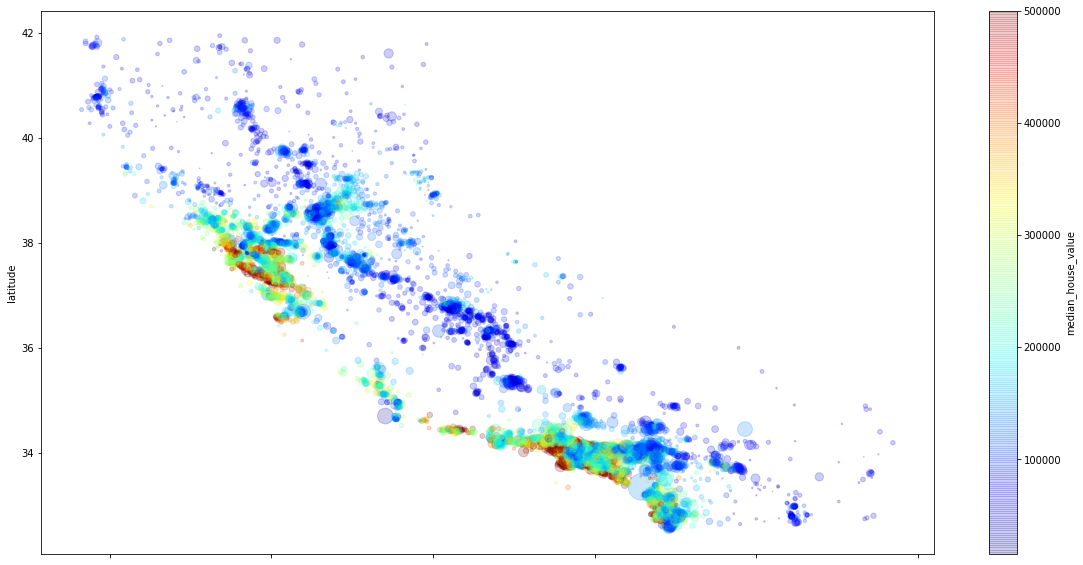

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, s=housing["population"]/50, figsize=(20,10), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [22]:
corr_matrix=housing.corr()

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48891c67b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f48883aa198>]], dtype=object)

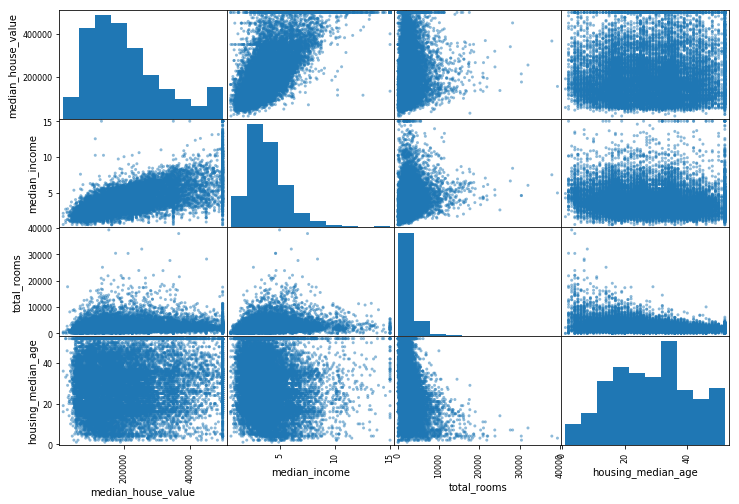

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12,8))

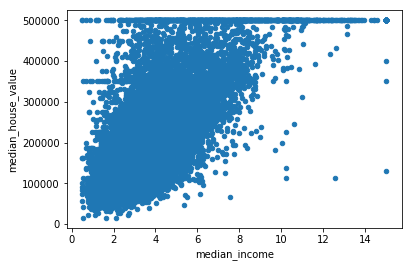

In [25]:
housing.plot(kind="scatter", y="median_house_value", x="median_income")

In [26]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [28]:
corr_matrix=housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

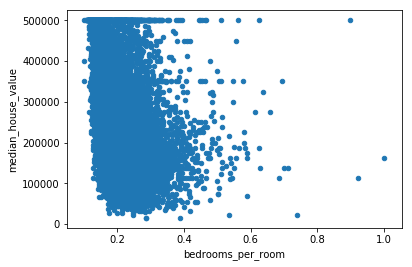

In [30]:
housing.plot(kind="scatter", y="median_house_value", x="bedrooms_per_room")

In [31]:
housing=strat_train_set.copy()

In [32]:
housing.drop("median_house_value", axis=1, inplace=True)

In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [34]:
housing_labels=strat_train_set["median_house_value"].copy()

In [35]:
print(type(housing_labels))
#housing.info()

<class 'pandas.core.series.Series'>


In [36]:
from sklearn.preprocessing import Imputer

In [37]:
imputer=Imputer(strategy="median")

In [38]:
housing_num=housing.drop("ocean_proximity", axis=1)

In [39]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [40]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [41]:
X=imputer.transform(housing_num)

In [42]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [43]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [45]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output=True)
houstin_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household=X[:,population_ix]/X[:,household_ix]
        population_per_household=X[:,bedrooms_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs=attr_adder.transform(housing.values)

In [98]:
pd.DataFrame(housing_extra_attribs).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2.0944,1.0354,0.223852
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,2.70796,0.955752,0.159057
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2.02597,1.01948,0.241291
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,4.13598,1.05099,0.200866
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3.04785,1.04238,0.231341


In [63]:
housing_cat_1hot.shape

(16512, 5)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([('imputer', Imputer(strategy="median")),('attr_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler())])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [70]:
housing_num.info()
housing_num_tr

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.8 MB


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.08649871,
        -0.1215581 ,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.03353391,
        -0.26453207, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.09240499,
        -0.15013227,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.03055414,
         0.06597972, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.06150916,
        -0.06408293, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.09586294,
        -0.06430388,  0.10180567]])

In [218]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class MyLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.encoder = LabelBinarizer()
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [210]:
from sklearn.pipeline import FeatureUnion
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer', Imputer(strategy="median")),('attr_adder', CombinedAttributesAdder()), ('std', StandardScaler())])
cat_pipeline=Pipeline([('selector', DataFrameSelector(cat_attribs)),('label_binarizer', MyLabelBinarizer())])
full_pipeline=FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline)])

In [100]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [211]:
housing_prepared=full_pipeline.fit_transform(housing)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
<class 'pandas.core.frame.DataFrame'>
['ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [127]:
pd.DataFrame(housing_prepared[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.086499,-0.121558,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,-0.033534,-0.264532,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.092405,-0.150132,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.089736,-0.093566,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.004194,-0.109027,0.269928,1.0,0.0,0.0,0.0,0.0


In [128]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [102]:
housing_prepared.shape

(16512, 16)

In [116]:
pd.DataFrame(housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.086499,-0.121558,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,-0.033534,-0.264532,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.092405,-0.150132,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.089736,-0.093566,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.004194,-0.109027,0.269928,1.0,0.0,0.0,0.0,0.0


In [117]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

In [118]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
some_data=housing.iloc[:5]

In [120]:
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

In [121]:
print("Predictions: {0}".format(lin_reg.predict(some_data_prepared)))
print("Labels: {0}".format(list(some_labels)))

Predictions: [ 210745.6703781   318250.78533739  211255.61140243   59219.24255363
  188503.94350055]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [135]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [137]:
lin_rmse

68789.921371853823

In [140]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)

In [141]:
tree_rmse

0.0

In [142]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [144]:
np.sqrt(-scores)

array([ 70131.29132935,  68656.17764084,  72464.48235396,  71380.37346391,
        73130.2237972 ,  74673.9975236 ,  69902.69707376,  68201.36434239,
        75090.31351924,  73414.16787967])

In [145]:
scores2=cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [148]:
np.mean(np.sqrt(-scores2)), np.std(np.sqrt(-scores2))

(69294.354696195602, 2887.6750457000799)

In [155]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_mse=mean_squared_error(housing_labels,forest_reg.predict(housing_prepared))
forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [156]:
np.mean(np.sqrt(-forest_scores)), np.std(np.sqrt(-forest_scores))

(53478.492391682536, 2351.8859088459303)

In [157]:
np.sqrt(forest_mse)

22788.959152358813

In [159]:
from sklearn.externals import joblib

joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [162]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators': [40,60,90], 'max_features': [2,4,6,8]}
]
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 90}

In [164]:
joblib.dump(grid_search.best_estimator_, "best_forest_reg.pkl")

['best_forest_reg.pkl']

In [165]:
cross_val_score(grid_search.best_estimator_, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

array([ -2.33277331e+09,  -2.17503353e+09,  -2.38533817e+09,
        -2.53853313e+09,  -2.33182959e+09,  -2.69598293e+09,
        -2.28818586e+09,  -2.16920384e+09,  -2.68332218e+09,
        -2.40637236e+09])

In [170]:
best_forest_scores=np.array([ -2.33277331e+09,  -2.17503353e+09,  -2.38533817e+09,
        -2.53853313e+09,  -2.33182959e+09,  -2.69598293e+09,
        -2.28818586e+09,  -2.16920384e+09,  -2.68332218e+09,
        -2.40637236e+09])
np.mean(np.sqrt(-best_forest_scores))

48963.698630216604

In [175]:
grid_search.cv_results_

/home/maciej/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/maciej/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/maciej/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/maciej/anaconda3/lib/python

{'mean_fit_time': array([ 0.75267401,  1.06801534,  1.62049017,  1.19863772,  1.78660069,
         2.71504879,  1.74464869,  2.52809973,  3.79688168,  2.18380651,
         3.29286256,  4.97443438]),
 'mean_score_time': array([ 0.03581247,  0.04904466,  0.07492127,  0.03313475,  0.04929085,
         0.07321544,  0.03290563,  0.04879045,  0.0732224 ,  0.03296542,
         0.05002289,  0.07563968]),
 'mean_test_score': array([ -2.78869528e+09,  -2.74765328e+09,  -2.69904466e+09,
         -2.47732065e+09,  -2.49118599e+09,  -2.46181474e+09,
         -2.47548869e+09,  -2.43940387e+09,  -2.41649661e+09,
         -2.47144532e+09,  -2.44445116e+09,  -2.43314786e+09]),
 'mean_train_score': array([ -4.18628500e+08,  -3.99323363e+08,  -3.81539759e+08,
         -3.73931421e+08,  -3.61120844e+08,  -3.49178355e+08,
         -3.71027746e+08,  -3.50408566e+08,  -3.45685985e+08,
         -3.72744599e+08,  -3.56682191e+08,  -3.44722881e+08]),
 'param_max_features': masked_array(data = [2 2 2 4 4 4 6 6 6

In [185]:
full_pipeline.get_params()['num_pipeline__attr_adder__add_bedrooms_per_room']

True

In [212]:
full_with_forest=Pipeline([('preparations', full_pipeline), ('predictor', RandomForestRegressor())])

In [202]:
full_with_forest.get_params()

{'memory': None,
 'predictor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'predictor__bootstrap': True,
 'predictor__criterion': 'mse',
 'predictor__max_depth': None,
 'predictor__max_features': 'auto',
 'predictor__max_leaf_nodes': None,
 'predictor__min_impurity_decrease': 0.0,
 'predictor__min_impurity_split': None,
 'predictor__min_samples_leaf': 1,
 'predictor__min_samples_split': 2,
 'predictor__min_weight_fraction_leaf': 0.0,
 'predictor__n_estimators': 10,
 'predictor__n_jobs': 1,
 'predictor__oob_score': False,
 'predictor__random_state': None,
 'predictor__verbose': 0,
 'predictor__warm_start': False,
 'preparations': FeatureUnion(n_jo

In [215]:

grid_search=GridSearchCV(full_with_forest, {'preparations__num_pipeline__attr_adder__add_bedrooms_per_room': [True, False]}, cv=5, scoring="neg_mean_squared_error")


In [217]:
grid_search.fit(housing, housing_labels)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
<class 'pandas.core.frame.DataFrame'>
['ocean_proximity']
<class 'pandas.core.frame.DataFrame'>
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
<class 'pandas.core.frame.DataFrame'>
['ocean_proximity']
<class 'pandas.core.frame.DataFrame'>
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
<class 'pandas.core.frame.DataFrame'>
['ocean_proximity']
<class 'pandas.core.frame.DataFrame'>
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
<class 'pandas.core.frame.DataFrame'>
['ocean_proximity']
<class 'pandas.core.frame.DataFrame'>
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'me

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparations', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), (...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'preparations__num_pipeline__attr_adder__add_bedrooms_per_room': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [219]:
grid_search.cv_results_

/home/maciej/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/maciej/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/maciej/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/maciej/anaconda3/lib/python

{'mean_fit_time': array([ 1.31809745,  1.28976016]),
 'mean_score_time': array([ 0.01683855,  0.02498422]),
 'mean_test_score': array([ -2.87225081e+09,  -2.84834755e+09]),
 'mean_train_score': array([ -5.16863095e+08,  -5.22106218e+08]),
 'param_preparations__num_pipeline__attr_adder__add_bedrooms_per_room': masked_array(data = [True False],
              mask = [False False],
        fill_value = ?),
 'params': [{'preparations__num_pipeline__attr_adder__add_bedrooms_per_room': True},
  {'preparations__num_pipeline__attr_adder__add_bedrooms_per_room': False}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([ -2.72233928e+09,  -2.66508315e+09]),
 'split0_train_score': array([ -5.21291508e+08,  -5.26075078e+08]),
 'split1_test_score': array([ -3.01849838e+09,  -2.94718530e+09]),
 'split1_train_score': array([ -5.15419017e+08,  -5.20040104e+08]),
 'split2_test_score': array([ -3.03414803e+09,  -2.97993385e+09]),
 'split2_train_score': array([ -5.11340551e+08,